In [66]:
import scipy as sp
import numpy as np
import time

try:
    from localgraphclustering import *
except:
    # when the package is not installed, import the local version instead. 
    # the notebook must be placed in the original "notebooks/" folder
    sys.path.append("../")
    from localgraphclustering import * 

import time

## Load data

In [67]:
g = GraphLocal('./datasets/ASTRAL-small-sized-mammoth-sims-geq-2.graphml','graphml',' ')

# import scipy as sp

# I = sp.sparse.csr_matrix(0.005*np.ones((n,n)))

# g.adjacency_matrix = g.adjacency_matrix + I

/usr/local/lib/python3.7/site-packages/localgraphclustering/GraphLocal.py:217: UserWarning:

Loading a graphml is not efficient, we suggest using an edgelist format for this API.



## Example on how to find all clusters in graph using local graph clustering

In [68]:
from sklearn.metrics import pairwise_distances

start = time.time()
# Compute the embeddings X and the pairwise distance matrix Z.
embeddings = compute_all_embeddings(g,rho_list=[1.0e-5,1.0e-1],alpha_list=[1.0e-1,2.0e-1],nsamples_from_rho=1,nsamples_from_alpha=1,njobs=6,normalized_objective=False,normalize=False)
X = normalize_embeddings(g,embeddings, norm_type = 2)
Z = pairwise_distances(X, metric='l2', n_jobs=6)
end = time.time()
print(end - start)

4.964632034301758


In [69]:
start = time.time()
# Find the clusters
labels = compute_clusters_given_distance(nclusters=10,Z=Z)
end = time.time()
print(end - start)

0.056561946868896484


## Visualize the output

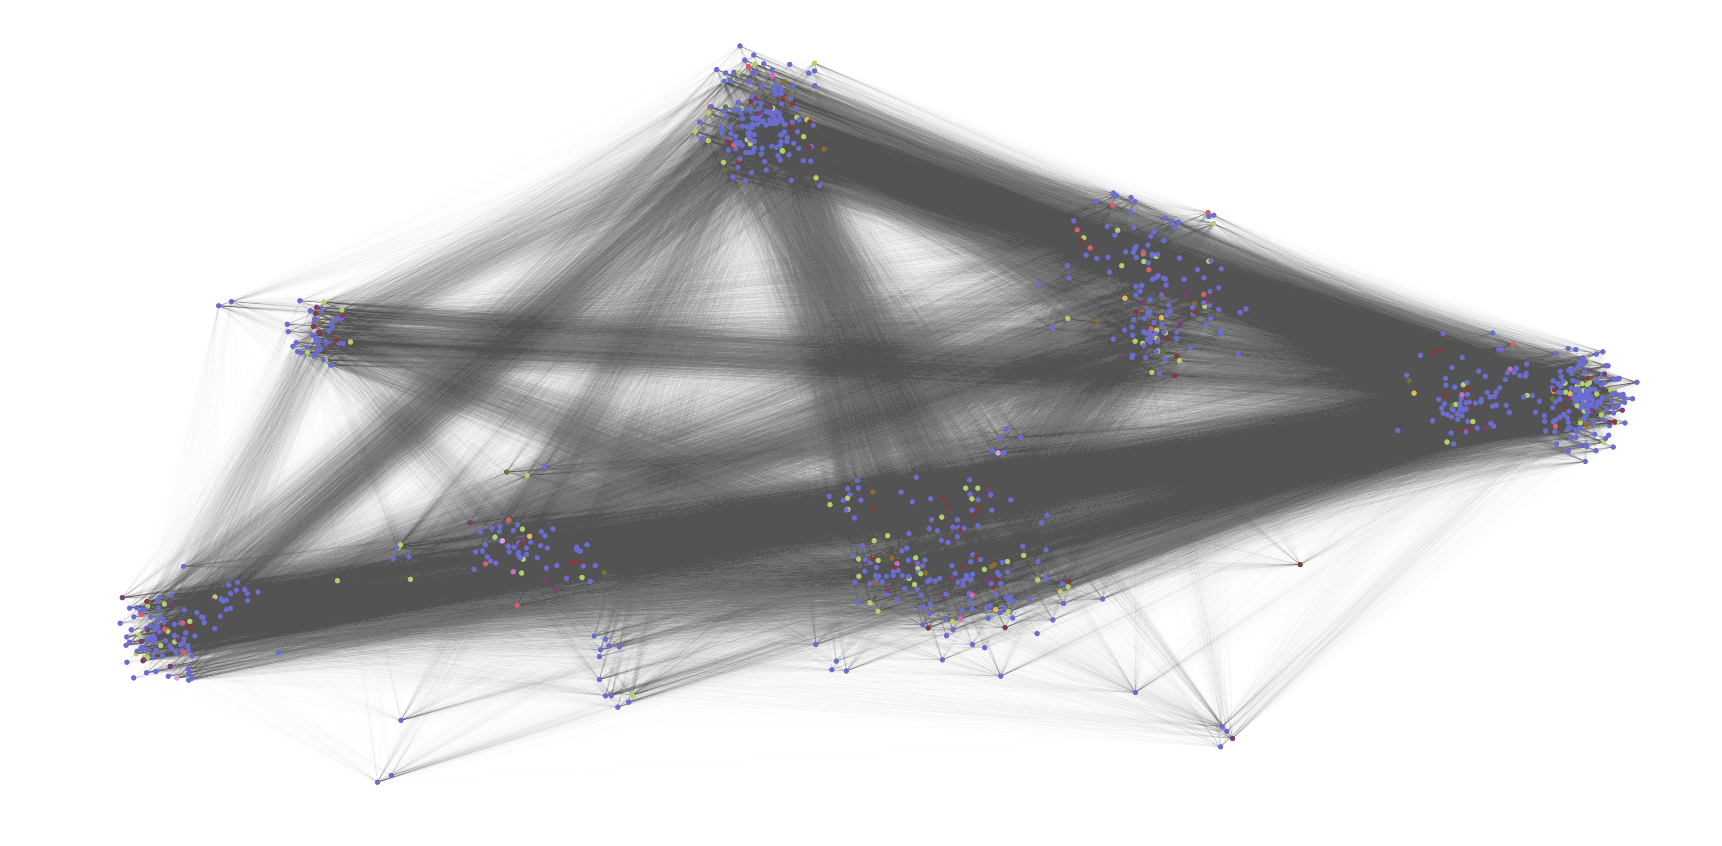

In [70]:
ld_coord = np.loadtxt('./datasets/JohnHopkins_coord.xy', dtype = 'Float64')
idx = np.argsort(ld_coord[:,0])
pos = np.zeros((g._num_vertices,2))
for i in range(g._num_vertices):
    pos[i] = ld_coord[idx[i],1:3]
    
drawing = g.draw_groups(pos,labels,figsize=(30,15),nodesize=5**2,edgealpha=0.01)

## Another example

In [6]:
# This example computes the embeddings and the clusters in one function. It is not recommended when we want to experiment
# with multiple parameters nclusters. Look at the fist example above for a faster approach.
labels = find_clusters(g,nclusters=4,rho_list=[1.0e-5,1.0e-1],alpha_list=[1.0e-1,2.0e-1],nsamples_from_rho=1,nsamples_from_alpha=1,njobs=6)

## Visualize the output

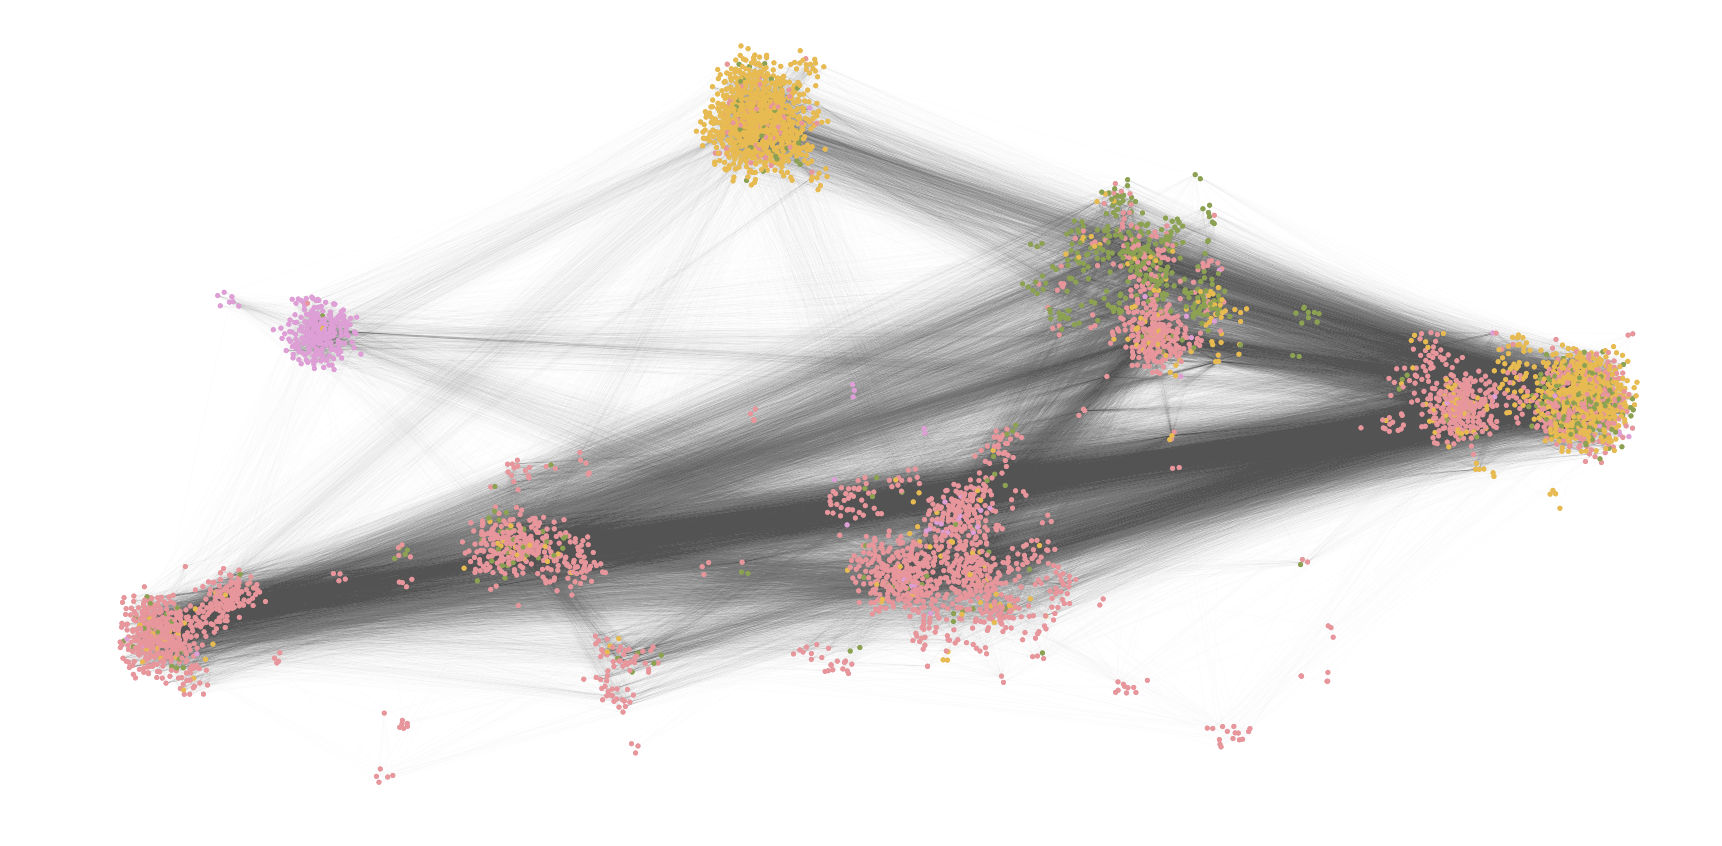

In [7]:
ld_coord = np.loadtxt('./datasets/JohnHopkins_coord.xy', dtype = 'Float64')
idx = np.argsort(ld_coord[:,0])
pos = np.zeros((g._num_vertices,2))
for i in range(g._num_vertices):
    pos[i] = ld_coord[idx[i],1:3]
    
drawing = g.draw_groups(pos,labels,figsize=(30,15),nodesize=5**2,edgealpha=0.01)

## Segment the graph

In [8]:
start = time.time()
# Compute the embeddings X and the pairwise distance matrix Z.
labels, info = graph_segmentation(g,rho_list=[1.0e-5,1.0e-1],alpha_list=[1.0e-1,2.0e-1],nsamples_from_rho=1,nsamples_from_alpha=1,njobs=6,ratio=0.1)
end = time.time()
print(end - start)

1.40743088722229eted:  97.07194105099865


In [9]:
X, Z = compute_embeddings_and_distances_from_region_adjacency(g,info,n_jobs=6)

In [10]:
labels = compute_clusters_from_region_adjacency(g,4,Z,info)

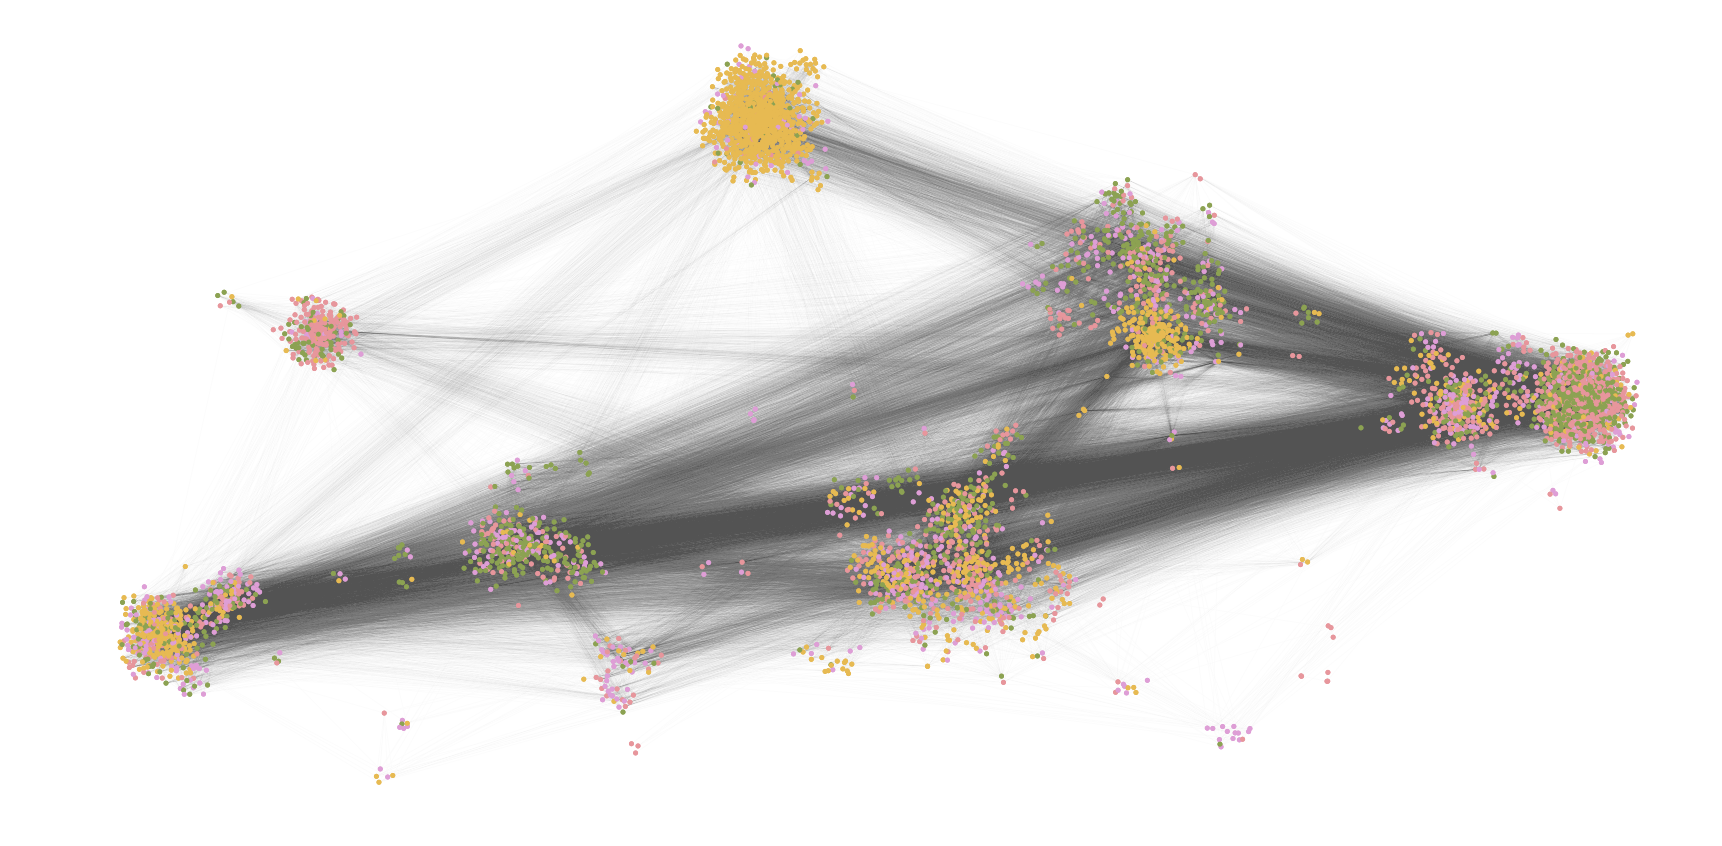

In [11]:
ld_coord = np.loadtxt('./datasets/JohnHopkins_coord.xy', dtype = 'Float64')
idx = np.argsort(ld_coord[:,0])
pos = np.zeros((g._num_vertices,2))
for i in range(g._num_vertices):
    pos[i] = ld_coord[idx[i],1:3]
    
drawing = g.draw_groups(pos,labels,figsize=(30,15),nodesize=5**2,edgealpha=0.01)

In [53]:
from sklearn.cluster import spectral_clustering as spclustering
start = time.time()
labels_spclustering = list(spclustering(g.adjacency_matrix, n_clusters=10, eigen_solver='arpack'))
end = time.time()
print(end - start)

labels_spclustering = np.array(labels_spclustering)

1.8236641883850098


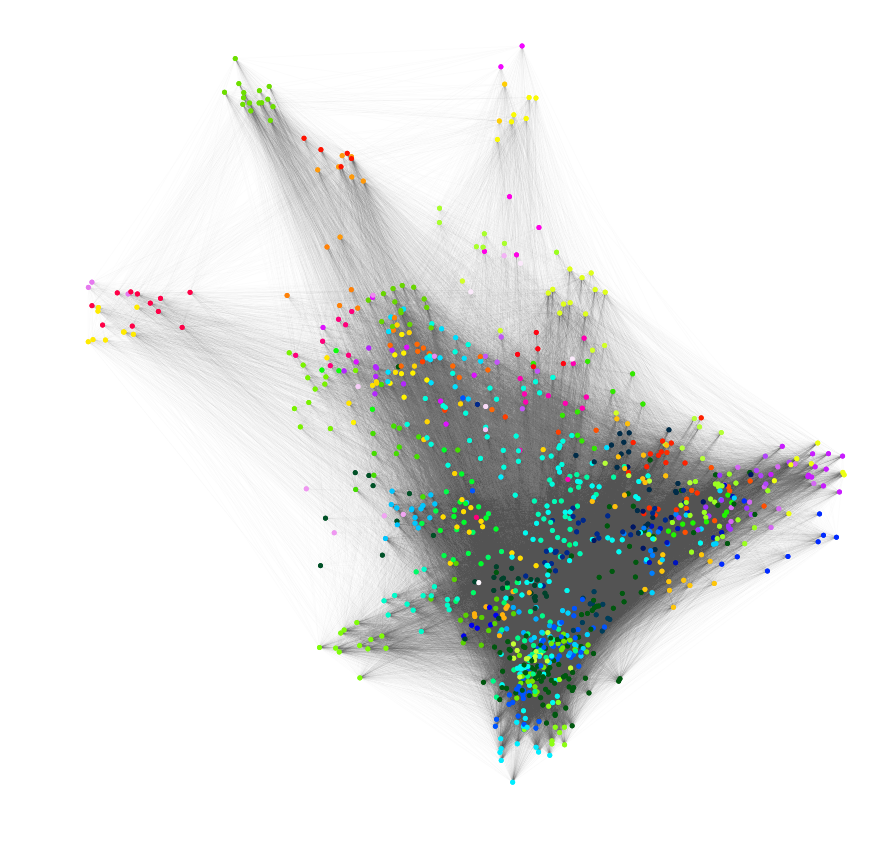

In [54]:
ld_coord = np.loadtxt('./datasets/JohnHopkins_coord.xy', dtype = 'Float64')
idx = np.argsort(ld_coord[:,0])
pos = np.zeros((g._num_vertices,2))
for i in range(g._num_vertices):
    pos[i] = ld_coord[idx[i],1:3]
    
drawing = g.draw_groups(pos,labels_spclustering,figsize=(30,15),nodesize=5**2,edgealpha=0.01)

In [50]:
n = g._num_vertices
from sklearn.cluster import spectral_clustering as spclustering
start = time.time()
labels_spclustering = list(spclustering(g.adjacency_matrix.toarray() + 0.05*np.ones((n,n)), n_clusters=10, eigen_solver='arpack'))
end = time.time()
print(end - start)

labels_spclustering = np.array(labels_spclustering)

1.322336196899414


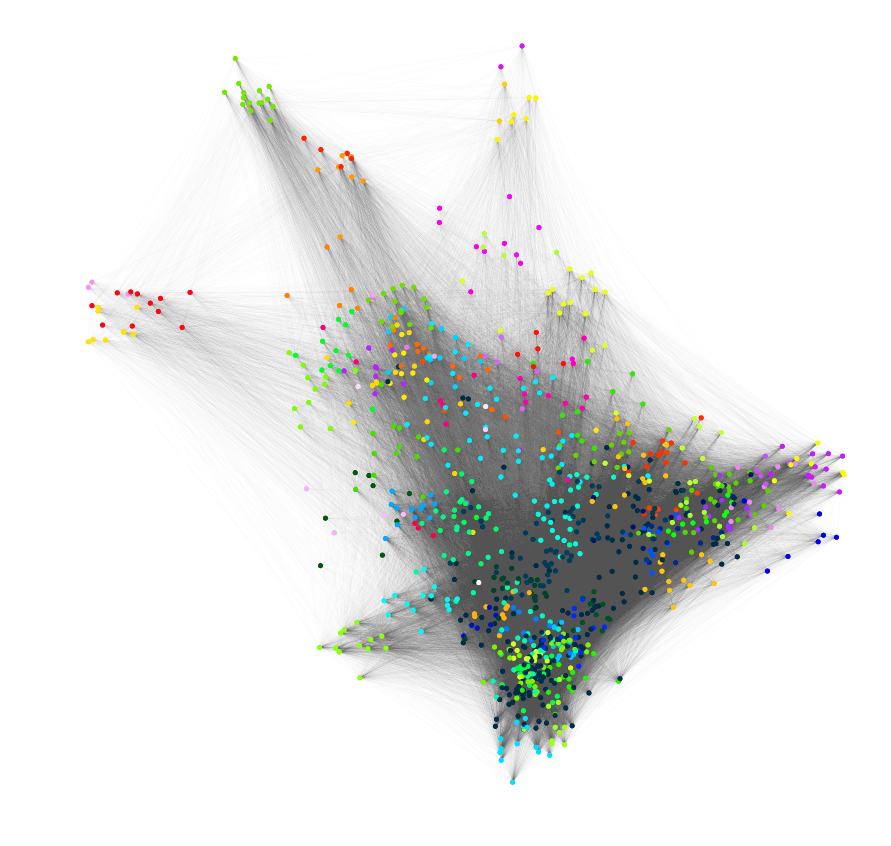

In [52]:
ld_coord = np.loadtxt('./datasets/JohnHopkins_coord.xy', dtype = 'Float64')
idx = np.argsort(ld_coord[:,0])
pos = np.zeros((g._num_vertices,2))
for i in range(g._num_vertices):
    pos[i] = ld_coord[idx[i],1:3]
    
drawing = g.draw_groups(pos,labels_spclustering,figsize=(30,15),nodesize=5**2,edgealpha=0.01)